In [2]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('data_NO2.csv', delimiter=';')

In [3]:
# Step 1: Convert 'datetime_utc' to datetime format and set it as the index
data['datetime_utc'] = pd.to_datetime(data['datetime_utc'])
data.set_index('datetime_utc', inplace=True)

# Step 2: Check for missing values
missing_values = data.isnull().sum()



**Plots**

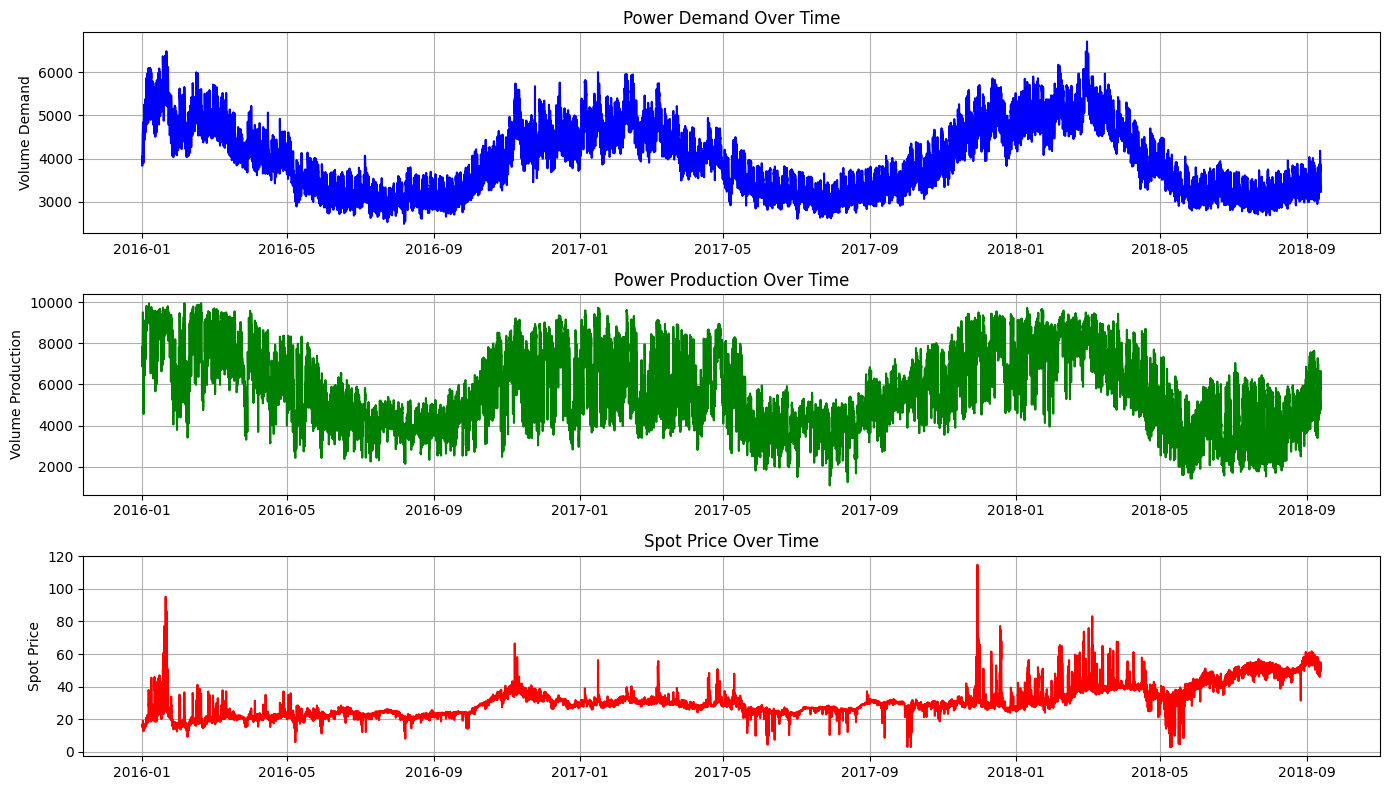

In [4]:

# Step 1: Plot time series for 'volume_demand', 'volume_production', and 'spot_price'
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(data.index, data['volume_demand'], label='Volume Demand', color='blue')
plt.title('Power Demand Over Time')
plt.ylabel('Volume Demand')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(data.index, data['volume_production'], label='Volume Production', color='green')
plt.title('Power Production Over Time')
plt.ylabel('Volume Production')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(data.index, data['spot_price'], label='Spot Price', color='red')
plt.title('Spot Price Over Time')
plt.ylabel('Spot Price')
plt.grid(True)

plt.tight_layout()
plt.show()


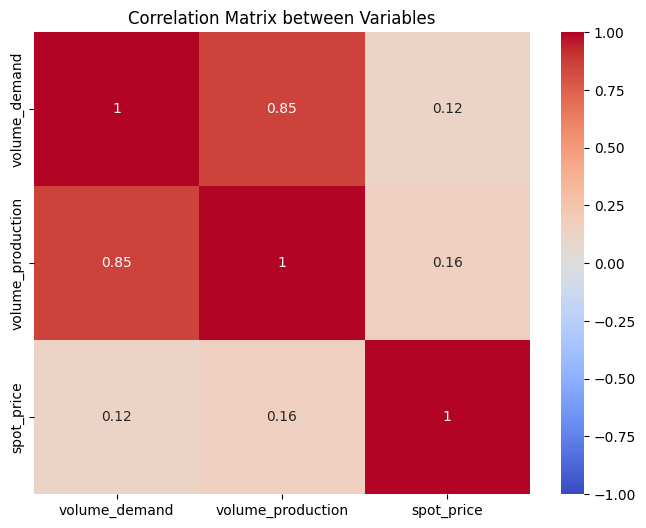

,volume_demand,volume_production,spot_price
volume_demand,1.000000,0.853488,0.119717
volume_production,0.853488,1.000000,0.157474
spot_price,0.119717,0.157474,1.000000


In [5]:
# Step 2: Compute correlation matrix between the variables
correlation_matrix = data.corr()

# Step 3: Plot the correlation matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Variables')
plt.show()

correlation_matrix

**Prepare the data:** We will create features such as lagged variables, time-based features (hour, day, month), and any other relevant features for prediction.

In [6]:
# Step 1: Feature Engineering for Time Series Prediction

# Extract relevant time-based features from the datetime index
data['hour'] = data.index.hour
data['day'] = data.index.day
data['month'] = data.index.month
data['weekday'] = data.index.weekday

# Create lagged features to incorporate previous values of spot price into the model
for lag in range(1, 25):  # Lagging by the previous 24 hours (1 day)
    data[f'spot_price_lag_{lag}'] = data['spot_price'].shift(lag)

# Drop rows with NaN values due to lagging
data.dropna(inplace=True)

# Step 2: Define the features (X) and the target (y)
X = data.drop(columns=['spot_price'])
y = data['spot_price']

# Step 3: Train-test split (time series, so no random shuffling)
train_size = int(len(X) * 0.8)  # Use 80% of the data for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# # Save the prepared data for the next step (AutoML with pycaret or other methods)
# import ace_tools as tools; tools.display_dataframe_to_user(name="Prepared Data for AutoML", dataframe=data)

data.head()

,volume_demand,volume_production,spot_price,hour,day,month,weekday,spot_price_lag_1,spot_price_lag_2,spot_price_lag_3,...,spot_price_lag_15,spot_price_lag_16,spot_price_lag_17,spot_price_lag_18,spot_price_lag_19,spot_price_lag_20,spot_price_lag_21,spot_price_lag_22,spot_price_lag_23,spot_price_lag_24
datetime_utc,,,,,,,,,,,,,,,,,,,,,
2016-01-01 23:00:00+00:00,4118.0,8121.0,16.47,23,1,1,4,16.25,16.75,17.33,...,15.39,15.19,15.37,15.36,15.75,15.47,15.57,15.74,16.04,16.39
2016-01-02 00:00:00+00:00,4004.0,7525.0,15.89,0,2,1,5,16.47,16.25,16.75,...,15.78,15.39,15.19,15.37,15.36,15.75,15.47,15.57,15.74,16.04
2016-01-02 01:00:00+00:00,3940.0,6347.0,15.03,1,2,1,5,15.89,16.47,16.25,...,16.15,15.78,15.39,15.19,15.37,15.36,15.75,15.47,15.57,15.74
2016-01-02 02:00:00+00:00,3900.0,5074.0,13.19,2,2,1,5,15.03,15.89,16.47,...,16.50,16.15,15.78,15.39,15.19,15.37,15.36,15.75,15.47,15.57
2016-01-02 03:00:00+00:00,3944.0,4564.0,12.69,3,2,1,5,13.19,15.03,15.89,...,16.72,16.50,16.15,15.78,15.39,15.19,15.37,15.36,15.75,15.47


In [10]:
# Install the H2O package
!pip install h2o
# !pip install pycaret



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.5-py2.py3-none-any.whl size=265646558 sha256=af1da6e45e5824de91c8bf816aae5300eb4f737bbc3d6e90d06253834131d0c9
  Stored in directory: /root/.cache/pip/wheels/1a/46/4f/9b366522399306d7849672d58aefb44c9b73378d710bde2853
Successfully built h2o


In [11]:
from pycaret.regression import *

# Step 1: Initialize the setup for AutoML
regression_setup = setup(data=data, target='spot_price', session_id=123, silent=True, fold=5)

# Step 2: Compare models automatically to find the best performing one
best_model = compare_models()

# Step 3: Finalize the model and make predictions on new data
final_model = finalize_model(best_model)
predictions = predict_model(final_model, data=X_test)

# Step 4: Evaluate the model
print(predictions)


ImportError: cannot import name 'interp' from 'scipy' (/usr/local/lib/python3.10/dist-packages/scipy/__init__.py)

In [12]:
# Step 1: Import necessary libraries
import h2o
from h2o.automl import H2OAutoML
import pandas as pd

# Step 2: Initialize H2O (this will start an H2O instance)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.24" 2024-07-16; OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04); OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpmerbjhl4
  JVM stdout: /tmp/tmpmerbjhl4/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpmerbjhl4/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,1 month and 21 days
H2O_cluster_name:,H2O_from_python_unknownUser_z1bypc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
h2o_data = h2o.H2OFrame(data)

# Step 4: Define the target and features for the AutoML model
target = 'spot_price'  # Replace with your actual target variable
features = h2o_data.columns
features.remove(target)

# Step 5: Split the data into train and test sets (80/20 split)
train, test = h2o_data.split_frame(ratios=[0.8])

# Step 6: Run AutoML for a maximum of 20 models, focusing on minimizing RMSE (or another metric if desired)
aml = H2OAutoML(max_models=20, seed=123, stopping_metric='RMSE')
aml.train(x=features, y=target, training_frame=train)

# Step 7: View the leaderboard with the top models
lb = aml.leaderboard
lb.head()

# Step 8: Make predictions on the test set
predictions = aml.predict(test)
predictions.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |████████████